Optimal indices: [5]
CNOTs counts: [324, 200, 332, 124, 156, 92, 156]


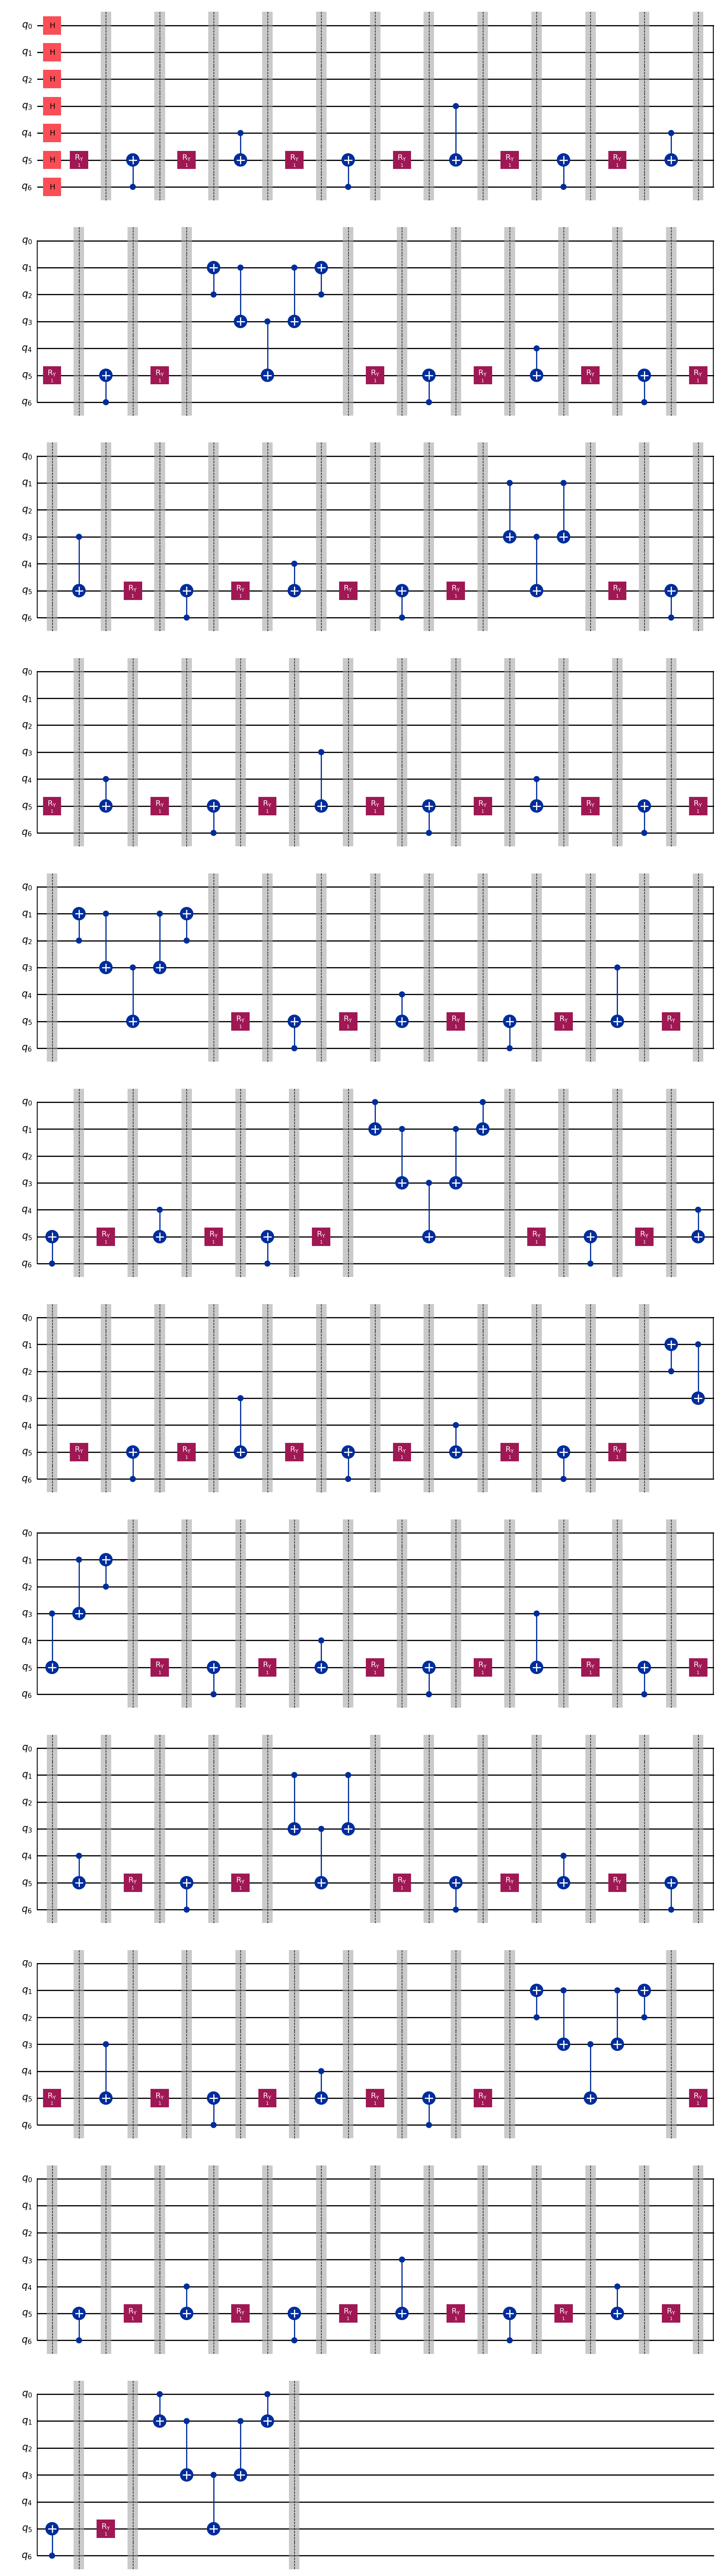

In [1]:
from src.quantum_circuit.quantum_hashing_circuit.circuit import get_quantum_circuit
from src.quantum_circuit.ucr_circuit_optimizer.graph import floyd_warshall, get_matrix_from_edges, get_shortest_paths
from src.quantum_circuit.ucr_circuit_optimizer.optimizer import optimize_cnots
from src.quantum_computer.architectures import *

num_qubits = FALCON_R511H_NUM_QUBITS
edges = FALCON_R511H_EDGES

adj_matrix = get_matrix_from_edges(num_qubits, edges)
dist_matrix, aux_path_matrix = floyd_warshall(adj_matrix)
optimal_indices, cnots_counts = optimize_cnots(num_qubits, dist_matrix)
print(f"Optimal indices: {optimal_indices}")
print(f"CNOTs counts: {cnots_counts}")

target = optimal_indices[0]
params = [1.0] * (2**num_qubits)
path_matrix = get_shortest_paths(aux_path_matrix)
qc = get_quantum_circuit(target, num_qubits, params, path_matrix)


qc.draw("mpl")